Libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt


Load Dataset

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")
print(df.columns)

Drop unnecessary columns

In [ ]:
df = df.drop(columns=["RowNumber","CustomerId","Surname"])
print(df.columns)

Encoding datas

In [50]:
encoder=["Gender", "Geography"]

label_encoders={}

for var in encoder:
    le = LabelEncoder()
    df[var]=le.fit_transform(df[var])
    label_encoders[var] = le
    
print(df[var])



0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64


Feature-X and Target-Y

In [ ]:
x = df.drop(columns=["Exited"])
y = df["Exited"]


spliting trainnig and testing datas

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

Standardizing

- Ensures all features have the same scale, preventing some features from dominating others.
- Speeds up training for models like Logistic Regression, which rely on gradient-based optimization.
- Improves convergence in machine learning models.

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Model Training

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)



Training Accuracy: 0.81


Accuracy Verifying

In [ ]:
train_accuracy = model.score(X_train, y_train)
print(train_accuracy)

Predictions

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

Output

In [ ]:
print(classification_report(y_test, y_pred))

Graph

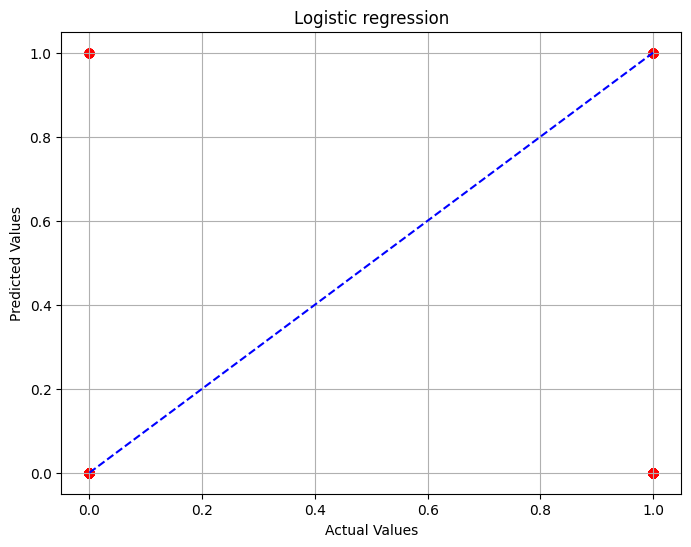

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Logistic regression")
plt.grid()
plt.show()